 1. What is their overall gross margin for their business?

In [ ]:
import pandas as pd

sales_data = pd.read_csv('/content/sales_data_1.csv')
gross_profit = sales_data['Selling price'] - sales_data['Buying price']

# Calculate the overall gross margin.
overall_gross_margin = gross_profit.sum() / sales_data['Selling price'].sum() * 100

# Print the overall gross margin.
print(f'Overall gross margin: {overall_gross_margin:.2f}%')


Overall gross margin: 23.33%


2. Which vendor is the most profitable?


In [ ]:
import pandas as pd
vendor_names = sales_data['Firm bought from'].unique()

# Calculate the profit margin for each vendor.
vendor_profit_margins = []
for vendor_name in vendor_names:
    vendor_data = sales_data[sales_data['Firm bought from'] == vendor_name]
    vendor_profit_margin = (vendor_data['Selling price'].sum() - vendor_data['Buying price'].sum()) / vendor_data['Selling price'].sum() * 100
    vendor_profit_margins.append((vendor_name, vendor_profit_margin))
vendor_profit_margins.sort(key=lambda x: x[1], reverse=True)
most_profitable_vendor = vendor_profit_margins[0][0]
print(f'The most profitable vendor is {most_profitable_vendor}.')


The most profitable vendor is Vendor9.


3. Which customer is the least profitable?

In [ ]:
customer_names = sales_data['Customer'].unique()

# Calculate the profit for each customer.
customer_profit = []
for customer_name in customer_names:
    customer_data = sales_data[sales_data['Customer'] == customer_name]
    customer_profit.append((customer_name, customer_data['Selling price'].sum() - customer_data['Buying price'].sum()))
customer_profit.sort(key=lambda x: x[1])
least_possible_customer = customer_profit[0][0]
print(f'The least possible customer is {least_possible_customer}.')


The least possible customer is Customer9.


4. Which day of the week was most profitable for them?


In [ ]:
import pandas as pd
df = pd.read_csv('/content/sales_data_1.csv')
df['date'] = pd.to_datetime(df['Date'])
df['profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['day_of_week'] = df['date'].dt.day_name()
profit_by_day = df.groupby('day_of_week')['profit'].sum().reset_index()
most_profitable_day = profit_by_day[profit_by_day['profit'] == profit_by_day['profit'].max()]
print("The most profitable day of the week is:")
print(most_profitable_day)

The most profitable day of the week is:
  day_of_week   profit
1      Monday  6847.34


5. Which day of the week was the least profitable for them?

In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df['profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['day_of_week'] = df['date'].dt.day_name()
profit_by_day = df.groupby('day_of_week')['profit'].sum().reset_index()
least_profitable_day = profit_by_day[profit_by_day['profit'] == profit_by_day['profit'].min()]
least_profitable_day_data = df[df['day_of_week'] == least_profitable_day.iloc[0]['day_of_week']]
print("The least profitable day of the week is:")
print(least_profitable_day)
print(least_profitable_day_data)

The least profitable day of the week is:
  day_of_week   profit
3      Sunday  3086.46
        Date Firm bought from  Buying price   Customer  Selling price  \
60  27/08/23          Vendor2         57.20  Customer7          63.08   
61  27/08/23          Vendor9         57.37  Customer2          72.03   
62  27/08/23          Vendor4         68.27  Customer4         100.62   
63  27/08/23          Vendor4         83.76  Customer3          96.10   
64  27/08/23          Vendor9         77.18  Customer4         104.27   
65  27/08/23          Vendor4         64.82  Customer6          87.45   
66  27/08/23          Vendor8         88.79  Customer3         105.59   
67  27/08/23          Vendor5         63.30  Customer5          92.92   
68  27/08/23          Vendor5         94.06  Customer5         125.67   
69  27/08/23          Vendor5         56.28  Customer6          82.16   

    Quantity sold       date   profit day_of_week  
60             16 2023-08-27    94.08      Sunday  
61   

6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv?


In [ ]:
df = pd.read_csv('/content/sales_data_2.csv')
df['date'] = pd.to_datetime(df['Date'])
df['daily_profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['3-day_avg_profit'] = df['daily_profit'].rolling(window=3).mean()
print(df[['date', 'daily_profit', '3-day_avg_profit']])


         date  daily_profit  3-day_avg_profit
0  2023-08-21        856.68               NaN
1  2023-08-21        146.71               NaN
2  2023-08-21        297.45        433.613333
3  2023-08-21         87.64        177.266667
4  2023-08-21         42.01        142.366667
..        ...           ...               ...
65 2023-08-27        407.34        552.863333
66 2023-08-27         84.00        552.070000
67 2023-08-27        947.84        479.726667
68 2023-08-27        126.44        386.093333
69 2023-08-27         25.88        366.720000

[70 rows x 3 columns]


7. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.


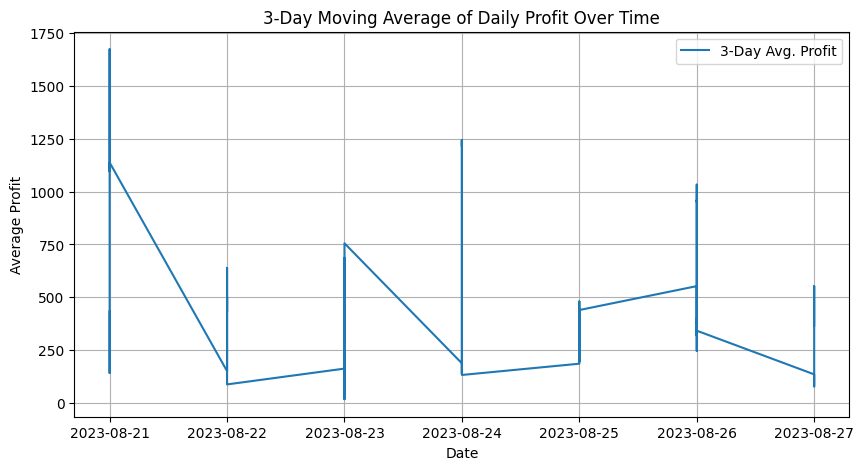

In [ ]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['Date'])
df['daily_profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
df['3-day_avg_profit'] = df['daily_profit'].rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['3-day_avg_profit'], label='3-Day Avg. Profit')
plt.title('3-Day Moving Average of Daily Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Average Profit')
plt.legend()
plt.grid(True)
plt.show()


8. Can you optimize the sales process to ensure gross margin is maximized?
  

In [ ]:
vendor_cogs = df.groupby('Firm bought from')['Buying price'].sum()
vendor_gross_margin = (df.groupby('Firm bought from')['Selling price'].sum() - vendor_cogs) / (sales_data.groupby('Firm bought from')['Selling price'].sum()) * 100
print(vendor_gross_margin)
customer_cogs = df.groupby('Customer')['Buying price'].sum()
customer_gross_margin = (df.groupby('Customer')['Selling price'].sum() - customer_cogs) / (df.groupby('Customer')['Selling price'].sum()) * 100
print(customer_gross_margin)


Firm bought from
Vendor1     21.327831
Vendor10    25.009843
Vendor2     23.012427
Vendor3     26.788408
Vendor4     22.948144
Vendor5     22.169579
Vendor6     21.141691
Vendor7     21.342516
Vendor8     17.670961
Vendor9     27.511695
dtype: float64
Customer
Customer1     24.544613
Customer10    23.792550
Customer2     24.649121
Customer3     19.079598
Customer4     23.265896
Customer5     26.442968
Customer6     25.664237
Customer7     18.379576
Customer8     24.512424
Customer9     23.275166
dtype: float64


9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

In [ ]:
buying_price_percentiles = df['Buying price'].quantile([0.25, 0.5, 0.75])
print("Buying price percentiles:")
print(buying_price_percentiles)
selling_price_percentiles = df['Selling price'].quantile([0.25, 0.5, 0.75])
print("Selling price percentiles:")
print(selling_price_percentiles)

Buying price percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Selling price percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [ ]:
sapota_buying_price_percentiles = df[df['Firm bought from'] == 'Sapota']['Buying price'].quantile([0.25, 0.75])
sapota_selling_price_percentiles = df[df['Firm bought from'] == 'Sapota']['Selling price'].quantile([0.25, 0.75])
sapota_buying_prices_below_25th_percentile = 0
if len(df[df['Firm bought from'] == 'Sapota']['Buying price']) > 0:
    sapota_buying_prices_below_25th_percentile = len(df[df['Firm bought from'] == 'Sapota']['Buying price'] < sapota_buying_price_percentiles[0.25]) / len(df[df['Firm bought from'] == 'Sapota']['Buying price'])
sapota_selling_prices_below_25th_percentile = 0
if len(df[df['Firm bought from'] == 'Sapota']['Selling price']) > 0:
    sapota_selling_prices_below_25th_percentile = len(df[df['Firm bought from'] == 'Sapota']['Selling price'] < sapota_selling_price_percentiles[0.25]) / len(df[df['Firm bought from'] == 'Sapota']['Selling price'])
sapota_buying_prices_above_75th_percentile = 0
if len(df[df['Firm bought from'] == 'Sapota']['Buying price']) > 0:
    sapota_buying_prices_above_75th_percentile = len(df[df['Firm bought from'] == 'Sapota']['Buying price'] > sapota_buying_price_percentiles[0.75]) / len(df[df['Firm bought from'] == 'Sapota']['Buying price'])
sapota_selling_prices_above_75th_percentile = 0
if len(df[df['Firm bought from'] == 'Sapota']['Selling price']) > 0:
    sapota_selling_prices_above_75th_percentile = len(df[df['Firm bought from'] == 'Sapota']['Selling price'] > sapota_selling_price_percentiles[0.75]) / len(df[df['Firm bought from'] == 'Sapota']['Selling price'])

print("Sapota's buying prices below the 25th percentile:", sapota_buying_prices_below_25th_percentile)
print("Sapota's selling prices below the 25th percentile:", sapota_selling_prices_below_25th_percentile)
print("Sapota's buying prices above the 75th percentile:", sapota_buying_prices_above_75th_percentile)
print("Sapota's selling prices above the 75th percentile:", sapota_selling_prices_above_75th_percentile)


Sapota's buying prices below the 25th percentile: 0
Sapota's selling prices below the 25th percentile: 0
Sapota's buying prices above the 75th percentile: 0
Sapota's selling prices above the 75th percentile: 0


11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin?

In [ ]:
vendor_gross_margin = df.groupby('Firm bought from')['Buying price'].sum() / df.groupby('Firm bought from')['Selling price'].sum() * 100
vendor_4_gross_margin = vendor_gross_margin['Vendor4']
optimal_gross_margin = vendor_gross_margin.max()
impact_of_honoring_vendor_4 = optimal_gross_margin - vendor_4_gross_margin
print("Impact of honoring Vendor 4 on optimal gross margin:", impact_of_honoring_vendor_4)


Impact of honoring Vendor 4 on optimal gross margin: 5.277182403479841


12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    

In [ ]:
vendor_gross_margin = df.groupby('Firm bought from')['Buying price'].sum() / df.groupby('Firm bought from')['Selling price'].sum() * 100
vendor_with_highest_gross_margin = vendor_gross_margin.idxmax()
theoretical_max_margin = 100 - vendor_gross_margin[vendor_with_highest_gross_margin]
print("Vendor with the highest gross margin:", vendor_with_highest_gross_margin)
print("Theoretical max margin:", theoretical_max_margin)


Vendor with the highest gross margin: Vendor8
Theoretical max margin: 17.67096134786918


13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

In [ ]:
total_revenue_per_day = df.groupby('Date')['Selling price'].sum()
average_selling_price_per_day = total_revenue_per_day / df.groupby('Date')['Quantity sold'].sum()
price_elasticity_of_demand = (average_selling_price_per_day.pct_change() / average_selling_price_per_day.shift(1)) / (total_revenue_per_day.pct_change() / total_revenue_per_day.shift(1))
print(price_elasticity_of_demand)


Date
2023-08-21            NaN
2023-08-22     -44.066048
2023-08-23       5.744513
2023-08-24     393.287140
2023-08-25     632.945946
2023-08-26     294.050048
2023-08-27    2114.394422
dtype: float64


In [ ]:
impact_of_price_increase = price_elasticity_of_demand * 1
impact_of_price_decrease = price_elasticity_of_demand * -1
print("Impact of a Rs. 1 increase in the selling price on sales:", impact_of_price_increase)
print("Impact of a Rs. 1 decrease in the selling price on sales:", impact_of_price_decrease)


Impact of a Rs. 1 increase in the selling price on sales: Date
2023-08-21            NaN
2023-08-22     -44.066048
2023-08-23       5.744513
2023-08-24     393.287140
2023-08-25     632.945946
2023-08-26     294.050048
2023-08-27    2114.394422
dtype: float64
Impact of a Rs. 1 decrease in the selling price on sales: Date
2023-08-21            NaN
2023-08-22      44.066048
2023-08-23      -5.744513
2023-08-24    -393.287140
2023-08-25    -632.945946
2023-08-26    -294.050048
2023-08-27   -2114.394422
dtype: float64
